<a href="https://colab.research.google.com/github/Rahul-Shanthkumar/MINI-PROJECT/blob/main/IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data : Images
# 1. use python libraries to scrape the images (using)

In [ ]:
!pip install bing-image-downloader


In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
from bing_image_downloader import downloader
downloader.download("racing bikes",limit=30,output_dir='images',
                    adult_filter_off=True)




[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.hdwallpapers.in/download/suzuki_motocross_bike_race-1920x1200.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallpapershome.com/images/wallpapers/dodge-challenger-srt-demon-720x1280-red-2017-new-york-auto-show-13357.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://iphoneswallpapers.com/wp-content/uploads/2017/04/Motocross-Biker-Mud-Racing-iPhone-Wallpaper-iphoneswallpapers_com.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://wallpapershome.com/images/wallpapers/aston-martin-vantage-lime-essence-1440x2560-2019-cars-4k-18143.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://wallpapershome.com/images/wallpapers/suzuki-gsx-s750-3840x2160-2018-bikes-4k-14719.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://wallpapershome.com/images/wallpapers/mercedes-benz-1280x720-formula-1-f1-lewis-hamilton-helmet-specs-2942.jp

In [ ]:
downloader.download("rugby ball leather",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://www.john-woodbridge.com/1032-large_default/1920s-rugby-ball.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-heritage-leather-t-soccer-ball-2_1024x1024.jpg?v=1554719760
[%] File Downloaded !

[%] Downloading Image #3 from https://www.john-woodbridge.com/1020-tm_large_default/1950s-football.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.academyballs.com/s/cc_images/teaserbox_1818127.jpg?t=1479054313
[%] File Downloaded !

[%] Downloading Image #5 from http://s3-ap-southeast-2.amazonaws.com/resources.farm1.mycms.me/goodbuddy-com-au/Resources/ProductImages/917_lo.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.shopify.com/s/files/1/0020/1025/1324/products/32p_black_1024x.png?v=1534865418
[%] File Downloaded !

[%] Downloading Image #7 from http://atlas-content-cdn.pixelsqui

In [ ]:
downloader.download("ice cream cone",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.craftymorning.com/wp-content/uploads/2016/05/cotton-candy-cones-party-favor.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://zolpwsuwoq-flywheel.netdna-ssl.com/wp-content/uploads/2017/09/boys-ice-cream-party-ideas.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.bravotv.com/sites/bravo/files/field_blog_image/2016/04/the-feast-overflowing-ice-cream-promote.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://c.stocksy.com/a/uDH400/z9/1019522.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.businesstoday.lk/cpanel/uploader/3128/Cargills-Mafic-Ice-1.jpg.JPEG
[%] File Downloaded !

[%] Downloading Image #6 from https://images.firstwefeast.com/complex/image/upload/f_auto,fl_lossy,q_auto,w_1200/r0jfkuo7cd2ovwxpygmr
[%] File Downloaded !

[%] Downloading Image #7 from https://belgique.co.uk/shop/517-thickbox_default/dripping-ca

In [ ]:
# preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['racing bikes','rugby ball leather','ice cream cone']
 

for category in CATEGORIES:
 class_num = CATEGORIES.index(category)  # Label Encoding the values
 path = os.path.join(DATADIR,category)   # Create path to use all the images
 for img in os.listdir(path):
   img_array = imread(os.path.join(path,img))
   #print(img_array.shape)
   #plt.imshow(img_arrray)
   img_resized = resize(img_array,(150,150,3))
   flat_data.append(img_resized.flatten())
   images.append(img_resized)
   target.append(class_num)
   
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
flat_data[0]

array([0.45490196, 0.56078431, 0.21156863, ..., 0.78784314, 0.50960784,
       0.30176471])

In [ ]:
# split data into training and testing
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=108)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_Grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_Grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1])

In [ ]:
y_test

array([2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.9696969696969697

In [ ]:
confusion_matrix(y_pred,y_test)

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 1,  0,  5]])

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.97        14\n           1       1.00      1.00      1.00        13\n           2       1.00      0.83      0.91         6\n\n    accuracy                           0.97        33\n   macro avg       0.98      0.94      0.96        33\nweighted avg       0.97      0.97      0.97        33\n'

In [ ]:
# save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter Your URLhttps://imgd.aeplcdn.com/640x348/bikewaleimg/ec/464/img/m/Hero-Racing-EBR-1190RS-1128_l.jpg?t=144224350&t=144224350&q=75
(338, 620, 3)
 PREDICTED OUTPUT: racing bikes


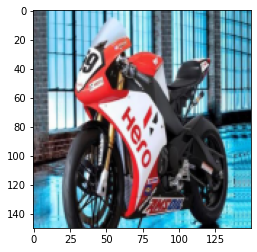

In [ ]:
# testing a brand new image 
flat_data = []
url = input('Enter Your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')